In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data/train.csv')

In [2]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df = df[['BedroomAbvGr', 'FullBath', 'HalfBath', 'GrLivArea', 'LotArea',
         'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice', 'YrSold']]
df.head()

,BedroomAbvGr,FullBath,HalfBath,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice,YrSold
0,3,2,1,1710,8450,7,5,2003,208500,2008
1,3,2,0,1262,9600,6,8,1976,181500,2007
2,3,2,1,1786,11250,7,5,2001,223500,2008
3,3,1,0,1717,9550,7,5,1915,140000,2006
4,4,2,1,2198,14260,8,5,2000,250000,2008


In [4]:
df = df[df['SalePrice'].notnull()]
df.head()

,BedroomAbvGr,FullBath,HalfBath,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice,YrSold
0,3,2,1,1710,8450,7,5,2003,208500,2008
1,3,2,0,1262,9600,6,8,1976,181500,2007
2,3,2,1,1786,11250,7,5,2001,223500,2008
3,3,1,0,1717,9550,7,5,1915,140000,2006
4,4,2,1,2198,14260,8,5,2000,250000,2008


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   BedroomAbvGr  1460 non-null   int64
 1   FullBath      1460 non-null   int64
 2   HalfBath      1460 non-null   int64
 3   GrLivArea     1460 non-null   int64
 4   LotArea       1460 non-null   int64
 5   OverallQual   1460 non-null   int64
 6   OverallCond   1460 non-null   int64
 7   YearBuilt     1460 non-null   int64
 8   SalePrice     1460 non-null   int64
 9   YrSold        1460 non-null   int64
dtypes: int64(10)
memory usage: 125.5 KB


In [6]:
df.isnull().sum()

BedroomAbvGr    0
FullBath        0
HalfBath        0
GrLivArea       0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
SalePrice       0
YrSold          0
dtype: int64

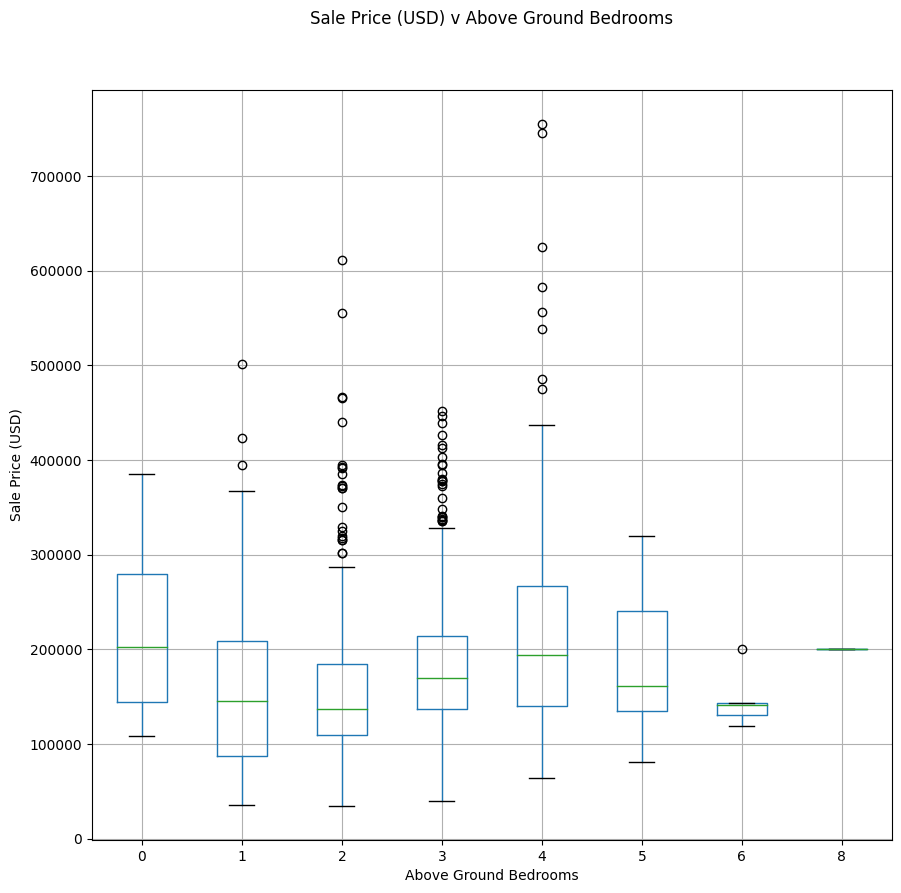

In [7]:
df.boxplot(column='SalePrice', by='BedroomAbvGr', figsize=(10, 10))
plt.suptitle('Sale Price (USD) v Above Ground Bedrooms')
plt.title('')
plt.ylabel('Sale Price (USD)')
plt.xlabel('Above Ground Bedrooms')
plt.show()

In [8]:
df['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

In [9]:
df = df[df['BedroomAbvGr'] > 0]
df = df[df['BedroomAbvGr'] < 5]

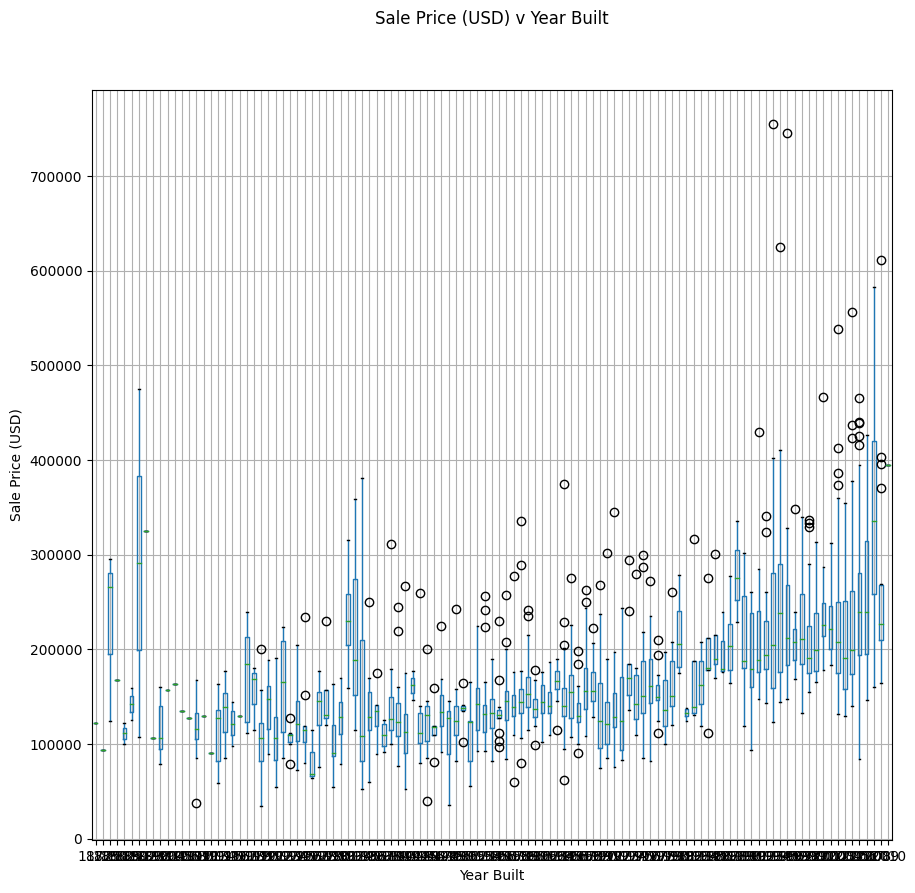

In [10]:
df.boxplot(column='SalePrice', by='YearBuilt', figsize=(10, 10))
plt.suptitle('Sale Price (USD) v Year Built')
plt.title('')
plt.ylabel('Sale Price (USD)')
plt.xlabel('Year Built')
plt.show()

In [11]:
df.head()

,BedroomAbvGr,FullBath,HalfBath,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice,YrSold
0,3,2,1,1710,8450,7,5,2003,208500,2008
1,3,2,0,1262,9600,6,8,1976,181500,2007
2,3,2,1,1786,11250,7,5,2001,223500,2008
3,3,1,0,1717,9550,7,5,1915,140000,2006
4,4,2,1,2198,14260,8,5,2000,250000,2008


In [15]:
df['YearBuilt'].min()

1872

In [16]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [17]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [18]:
y_pred = linear_reg.predict(X)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))


In [20]:
error

38376.13775872512

In [21]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)


DecisionTreeRegressor(random_state=0)

In [22]:
y_pred = dec_tree_reg.predict(X)

In [23]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))


$270.35


In [24]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth': max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [25]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))


$19,858.10


In [26]:
X

,BedroomAbvGr,FullBath,HalfBath,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YrSold
0,3,2,1,1710,8450,7,5,2003,2008
1,3,2,0,1262,9600,6,8,1976,2007
2,3,2,1,1786,11250,7,5,2001,2008
3,3,1,0,1717,9550,7,5,1915,2006
4,4,2,1,2198,14260,8,5,2000,2008
...,...,...,...,...,...,...,...,...,...
1455,3,2,1,1647,7917,6,5,1999,2007
1456,3,2,0,2073,13175,6,6,1978,2010
1457,4,2,0,2340,9042,7,9,1941,2010
1458,2,1,0,1078,9717,5,6,1950,2010


In [27]:
X = np.array([[2, 2, 1, 1400, 1400, 8, 8, 2000, 2010]])
X

array([[   2,    2,    1, 1400, 1400,    8,    8, 2000, 2010]])

In [28]:
y_pred = regressor.predict(X)
y_pred

c:\Users\gregv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([208000.])